In [181]:
import hw
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [371]:
class LogisticRegressionNN(nn.Module):
    def __init__(self):
        super(LogisticRegressionNN, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

class DeeperNN(nn.Module):
    def __init__(self):
        super(DeeperNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
        
def min_entropy(generator, neural_network, optim_func, title = 'Decision Boundary'):

    X_train, X_test, y_train, y_test = generator.data_split()

    X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

    net = neural_network
    criterion = nn.BCELoss()
    if optim_func == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr = 0.01)
    else:
        optimizer = torch.optim.Adam(net.parameters(), lr = 0.01)

    epochs = 1000
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = net(X_train_tensor).squeeze()
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

    test = net(X_test_tensor).squeeze()
    pred = np.where(test >= 0.5, 1.0, 0.0)
    acc = hw.binary_accuracy(pred, y_test)
    print(f'PyTorch Accuracy: {acc:.4f}')
    
    sklearn_acc = hw.sklearn_logreg(X_train, y_train, X_test, y_test)
    print(f'Scikit-learn Accuracy: {sklearn_acc:.4f}')

    plot(net, X_train, y_train, f"{title} Decision Boundary")


def plot(net, X, y, title="Decision Boundary"):

    x_range = (np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1)
    y_range = (np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1)

    x_points = np.arange(x_range[0], x_range[1], 0.01)
    y_points = np.arange(y_range[0], y_range[1], 0.01)
    grid_x, grid_y = np.meshgrid(x_points, y_points)

    grid = torch.tensor(np.column_stack([grid_x.flatten(), grid_y.flatten()]), dtype = torch.float32)

    with torch.no_grad():
        Z = net(grid).squeeze().numpy()
        Z = np.where(Z >= 0.5, 1.0, 0.0).reshape(grid_x.shape)

    plt.figure()
    plt.contourf(grid_x, grid_y, Z, alpha = 0.5, cmap = 'twilight')
    plt.scatter(X[:, 0], X[:, 1], c = y, edgecolor = 'k', cmap = 'twilight')
    plt.title(title)


'Paired', 'Set3', 'cividis', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

PyTorch Accuracy: 0.9848
Scikit-learn Accuracy: 0.9848


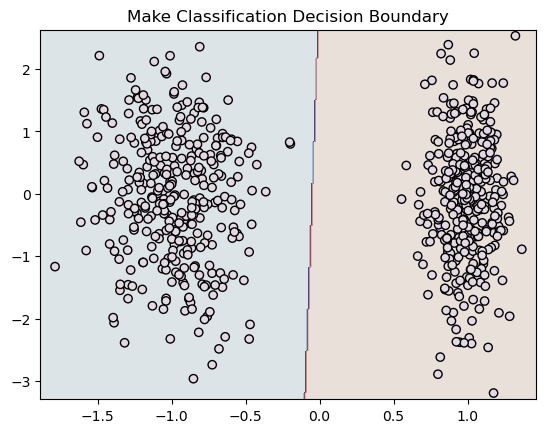

In [372]:
min_entropy(hw.Make_classification(1000), LogisticRegressionNN(), 'SGD', 'Make Classification')

PyTorch Accuracy: 0.7727
Scikit-learn Accuracy: 0.8455


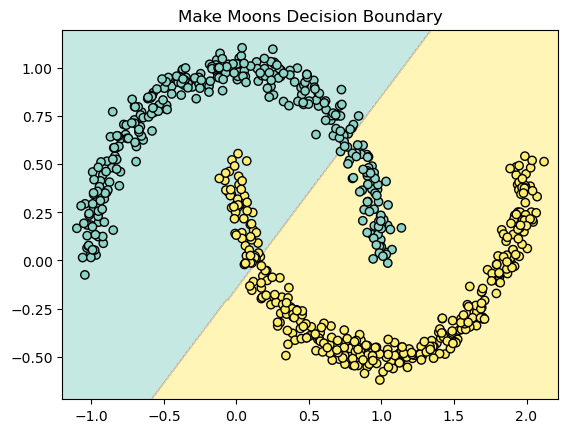

In [281]:
min_entropy(hw.Make_moons(1000), LogisticRegressionNN(), 'SGD', 'Make Moons')

PyTorch Accuracy: 0.5364
Scikit-learn Accuracy: 0.4697


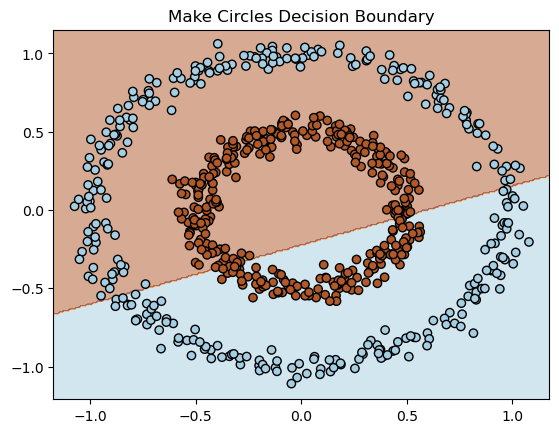

In [258]:
min_entropy(hw.Make_circles(1000), LogisticRegressionNN(), 'SGD', 'Make Circles')

In [206]:
print('Creating data using make_moons and make_circles decreases the accuracy of the classifier because the data forms shapes rather than splitting linearly like in make_classification.')

Creating data using make_moons and make_circles decreases the accuracy of the classifier because the data forms shapes rather than splitting linearly like in make_classification.


PyTorch Accuracy: 0.9848
Scikit-learn Accuracy: 0.9485


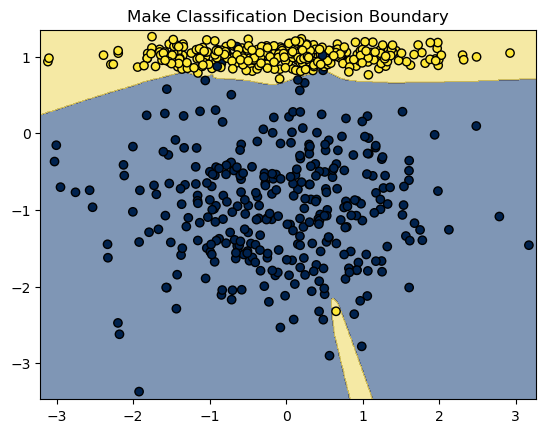

In [300]:
min_entropy(hw.Make_classification(1000), DeeperNN(), 'ADAM', 'Make Classification')

PyTorch Accuracy: 1.0000
Scikit-learn Accuracy: 0.8636


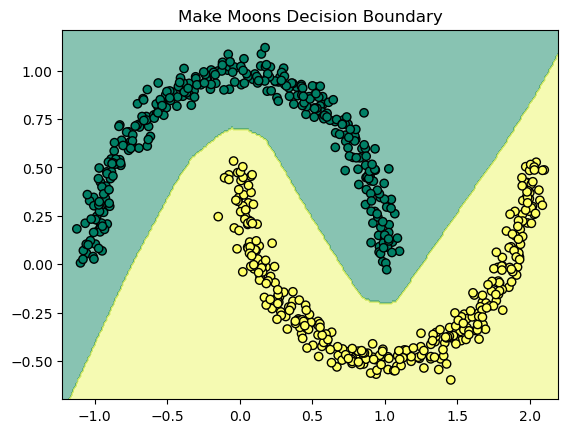

In [208]:
min_entropy(hw.Make_moons(1000), DeeperNN(), 'ADAM', 'Make Moons')

PyTorch Accuracy: 1.0000
Scikit-learn Accuracy: 0.4848


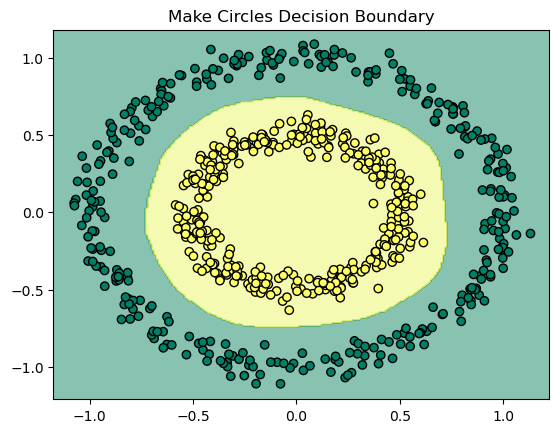

In [209]:
min_entropy(hw.Make_circles(1000), DeeperNN(), 'ADAM', 'Make Circles')